# 💡 Project Overview
Welcome to our Colab Notebook project, where we explore the relationship between various parameters (tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4) and the stability of a smart grid. 🌐 In this project, we aim to develop a system that can predict the stability of a smart grid based on these parameters, enhancing the efficiency and reliability of modern energy networks.

# ⚡Smart Grid Stability
Smart grid stability refers to the ability of the electrical grid to maintain a continuous and reliable supply of electricity despite fluctuations in demand and supply, disturbances, and faults. 🔌 It ensures that the grid operates within safe limits, preventing blackouts, equipment damage, and inefficiencies.

# 🔌Objectives

1. Analyze Correlations 📊:

Investigate the relationships between reaction times (tau1, tau2, tau3, tau4), power consumption parameters (p1, p2, p3, p4), and generation parameters (g1, g2, g3, g4) with the stability of the smart grid.

2. Develop Predictive Models 🧠:

Create machine learning models to predict the stability of the smart grid based on the identified parameters.

3. Improve Grid Stability 🔧:

Use the predictive system to enhance the operational strategies of the smart grid, ensuring a more stable and reliable energy supply.

4. Visualization and Insights 📈:

Provide clear visualizations and insights to understand the impact of different parameters on grid stability.


---


By achieving these objectives, we aim to contribute to the development of more robust and efficient smart grids, supporting the growing demand for sustainable and reliable energy solutions. 🌱⚡

# 1️⃣ Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='/content/drive/MyDrive/cleaned_electricitydata.csv'
df=pd.read_csv(path)

# 2️⃣ EDA:

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,row_num
0,0.500793,5.284357,5.797771,6.734360,3.387591,-0.972783,-1.662152,-0.752656,0.802707,0.642260,0.513210,0.204237,-0.014354,stable,1
1,0.500793,5.284357,6.734360,5.797771,3.387591,-0.972783,-0.752656,-1.662152,0.802707,0.642260,0.204237,0.513210,-0.014354,stable,1
2,0.500793,5.797771,5.284357,6.734360,3.387591,-1.662152,-0.972783,-0.752656,0.802707,0.513210,0.642260,0.204237,-0.014354,stable,1
3,0.500793,5.797771,6.734360,5.284357,3.387591,-1.662152,-0.752656,-0.972783,0.802707,0.513210,0.204237,0.642260,-0.014354,stable,1
4,0.500793,6.734360,5.284357,5.797771,3.387591,-0.752656,-0.972783,-1.662152,0.802707,0.204237,0.642260,0.513210,-0.014354,stable,1


In [4]:
df.tail()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,row_num
59995,9.999469,5.677620,8.002448,7.360514,3.280473,-0.870700,-0.707238,-1.702536,0.584174,0.296674,0.710548,0.233335,0.046861,unstable,1
59996,9.999469,7.360514,5.677620,8.002448,3.280473,-1.702536,-0.870700,-0.707238,0.584174,0.233335,0.296674,0.710548,0.046861,unstable,1
59997,9.999469,7.360514,8.002448,5.677620,3.280473,-1.702536,-0.707238,-0.870700,0.584174,0.233335,0.710548,0.296674,0.046861,unstable,1
59998,9.999469,8.002448,5.677620,7.360514,3.280473,-0.707238,-0.870700,-1.702536,0.584174,0.710548,0.296674,0.233335,0.046861,unstable,1
59999,9.999469,8.002448,7.360514,5.677620,3.280473,-0.707238,-1.702536,-0.870700,0.584174,0.710548,0.233335,0.296674,0.046861,unstable,1


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

tau1       0
tau2       0
tau3       0
tau4       0
p1         0
p2         0
p3         0
p4         0
g1         0
g2         0
g3         0
g4         0
stab       0
stabf      0
row_num    0
dtype: int64

In [7]:
df.dtypes

tau1       float64
tau2       float64
tau3       float64
tau4       float64
p1         float64
p2         float64
p3         float64
p4         float64
g1         float64
g2         float64
g3         float64
g4         float64
stab       float64
stabf       object
row_num      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tau1     60000 non-null  float64
 1   tau2     60000 non-null  float64
 2   tau3     60000 non-null  float64
 3   tau4     60000 non-null  float64
 4   p1       60000 non-null  float64
 5   p2       60000 non-null  float64
 6   p3       60000 non-null  float64
 7   p4       60000 non-null  float64
 8   g1       60000 non-null  float64
 9   g2       60000 non-null  float64
 10  g3       60000 non-null  float64
 11  g4       60000 non-null  float64
 12  stab     60000 non-null  float64
 13  stabf    60000 non-null  object 
 14  row_num  60000 non-null  int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 6.9+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tau1,60000.0,5.250000,2.742434,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,60000.0,5.250001,2.742437,0.500141,2.875011,5.249981,7.624896,9.999837
tau3,60000.0,5.250001,2.742437,0.500141,2.875011,5.249981,7.624896,9.999837
tau4,60000.0,5.250001,2.742437,0.500141,2.875011,5.249981,7.624896,9.999837
p1,60000.0,3.750000,0.752129,1.582590,3.218300,3.751025,4.282420,5.864418
p2,60000.0,-1.250000,0.433017,-1.999945,-1.624997,-1.249996,-0.874993,-0.500025
p3,60000.0,-1.250000,0.433017,-1.999945,-1.624997,-1.249996,-0.874993,-0.500025
p4,60000.0,-1.250000,0.433017,-1.999945,-1.624997,-1.249996,-0.874993,-0.500025
g1,60000.0,0.525000,0.274244,0.050009,0.287521,0.525009,0.762435,0.999937
g2,60000.0,0.525000,0.274243,0.050028,0.287497,0.525007,0.762490,0.999982


###  📈 Dataset Description

Our dataset consists of various parameters that influence the stability of a smart grid. Below is an organized overview of the dataset with corresponding emojis to make it more engaging:

#### Reaction Times (tau) ⏱️
1. **tau1:** Reaction time parameter 1
2. **tau2:** Reaction time parameter 2
3. **tau3:** Reaction time parameter 3
4. **tau4:** Reaction time parameter 4

#### Power Consumption Parameters (p) 🔌
1. **p1:** Power consumption parameter 1
2. **p2:** Power consumption parameter 2
3. **p3:** Power consumption parameter 3
4. **p4:** Power consumption parameter 4

#### Generation Parameters (g) ⚡
1. **g1:** Generation parameter 1
2. **g2:** Generation parameter 2
3. **g3:** Generation parameter 3
4. **g4:** Generation parameter 4

Each of these parameters plays a crucial role in determining the overall stability of the smart grid. By analyzing these factors, we aim to develop a predictive model that can enhance the reliability and efficiency of smart grid operations.

# 3️⃣ Visulation parameters  of Reaction Times:

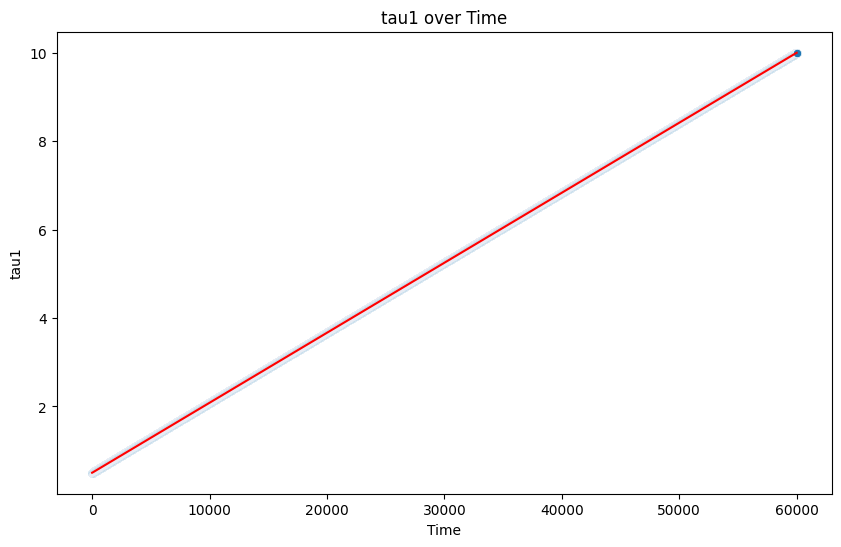

In [10]:
# Scatter plot with a trend line to see how tau1 changes over time
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='tau1', data=df)
sns.lineplot(x=df.index, y='tau1', data=df, color='red')
plt.title('tau1 over Time')
plt.xlabel('Time')
plt.ylabel('tau1')
plt.show()

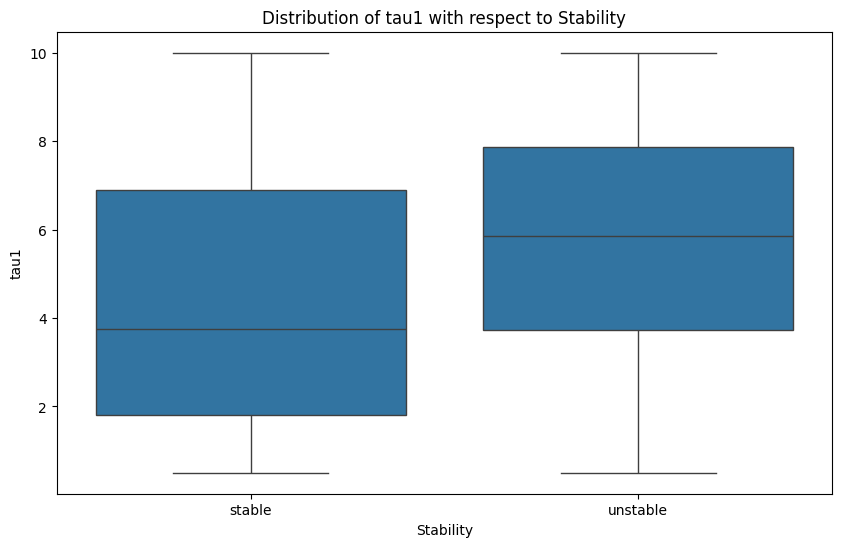

In [11]:
# Boxplot to visualize the distribution of tau1 with respect to stab
plt.figure(figsize=(10, 6))
sns.boxplot(x='stabf', y='tau1', data=df)
plt.title('Distribution of tau1 with respect to Stability')
plt.xlabel('Stability')
plt.ylabel('tau1')
plt.show()

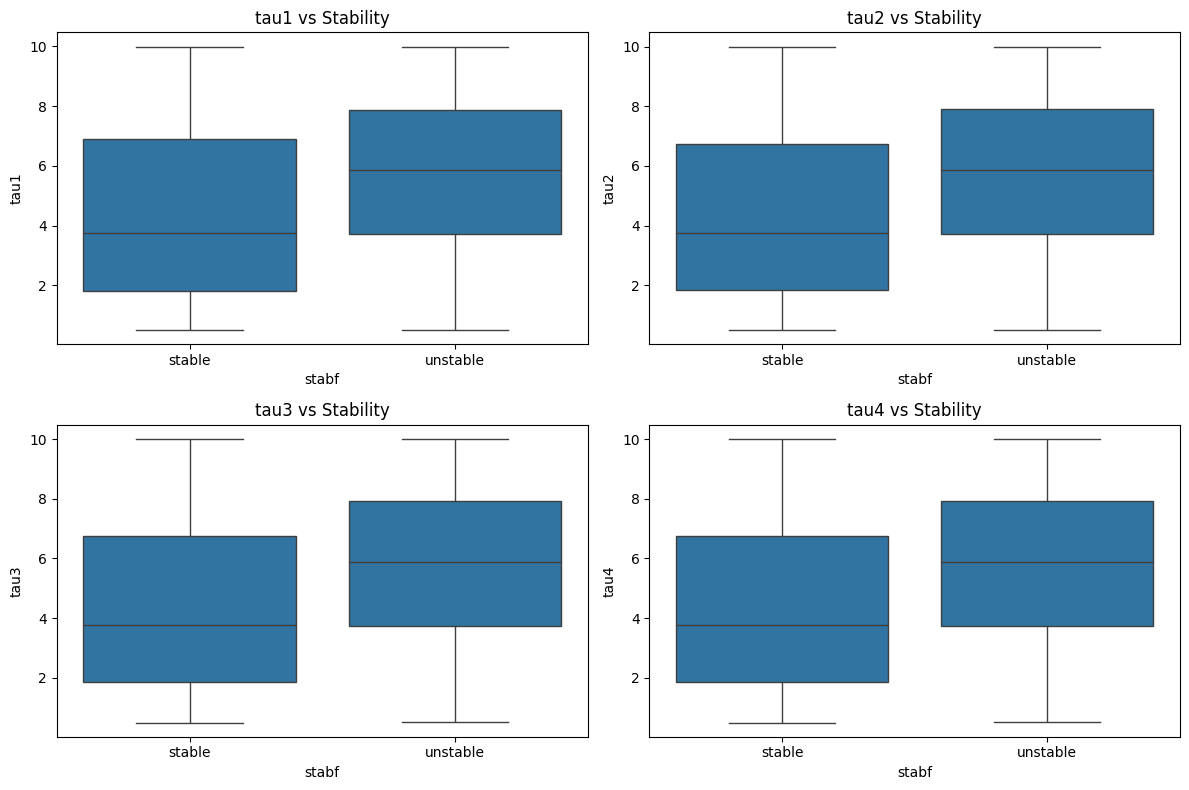

In [12]:
 # Create box plots for tau1 to tau4 grouped by stability (stabf)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='stabf', y='tau1', data=df, ax=axs[0, 0])
axs[0, 0].set_title('tau1 vs Stability')

sns.boxplot(x='stabf', y='tau2', data=df, ax=axs[0, 1])
axs[0, 1].set_title('tau2 vs Stability')

sns.boxplot(x='stabf', y='tau3', data=df, ax=axs[1, 0])
axs[1, 0].set_title('tau3 vs Stability')

sns.boxplot(x='stabf', y='tau4', data=df, ax=axs[1, 1])
axs[1, 1].set_title('tau4 vs Stability')

plt.tight_layout()
plt.show()

          tau1      tau2      tau3      tau4      stab
tau1  1.000000 -0.002550 -0.002550 -0.002550  0.275761
tau2 -0.002550  1.000000  0.005554  0.005554  0.283417
tau3 -0.002550  0.005554  1.000000  0.005554  0.283417
tau4 -0.002550  0.005554  0.005554  1.000000  0.283417
stab  0.275761  0.283417  0.283417  0.283417  1.000000


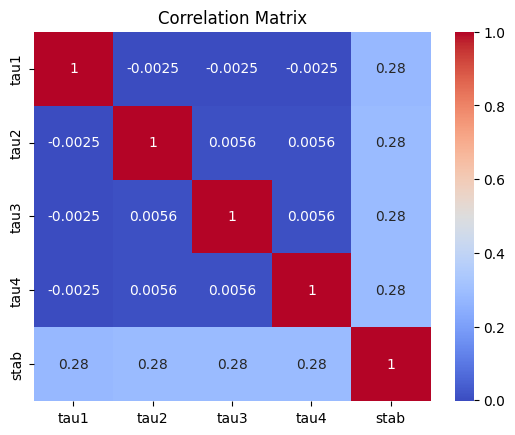

In [13]:
# Calculate correlations between reaction times and stab
correlation_matrix = df[['tau1', 'tau2', 'tau3', 'tau4', 'stab']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# ✅ Conclusion on the Relationship Between Reaction Times (tau1, tau2, tau3, tau4) and Smart Grid Stability:

Based on the provided box plots and correlation matrix, we can draw several conclusions regarding the relationship between the reaction times (tau1, tau2, tau3, tau4) and the stability of the smart grid:


---


1. Weak Positive Correlation 📈:

The correlation matrix shows a weak positive correlation (around 0.28) between each of the reaction times (tau1, tau2, tau3, tau4) and the stability of the smart grid (stab). This indicates a slight tendency for higher reaction times to be associated with higher instability. However, this relationship is not strong.

2. Distribution Analysis 📊:

The box plots illustrate the distribution of each reaction time parameter (tau1, tau2, tau3, tau4) across stable and unstable states of the grid. While there are differences in medians and interquartile ranges between stable and unstable states, these differences are not substantial.

3. Independence Among Reaction Times 🔄:

The reaction times (tau1, tau2, tau3, tau4) show little to no correlation among themselves (values close to zero in the correlation matrix). This suggests that the reaction times of different network participants behave independently and do not influence each other significantly.






# 4️⃣ Visulation of Power Consumption Parameters

            p1        p2        p3        p4      stab
p1    1.000000 -0.578983 -0.578983 -0.578983  0.010278
p2   -0.578983  1.000000  0.002833  0.002833 -0.005951
p3   -0.578983  0.002833  1.000000  0.002833 -0.005951
p4   -0.578983  0.002833  0.002833  1.000000 -0.005951
stab  0.010278 -0.005951 -0.005951 -0.005951  1.000000


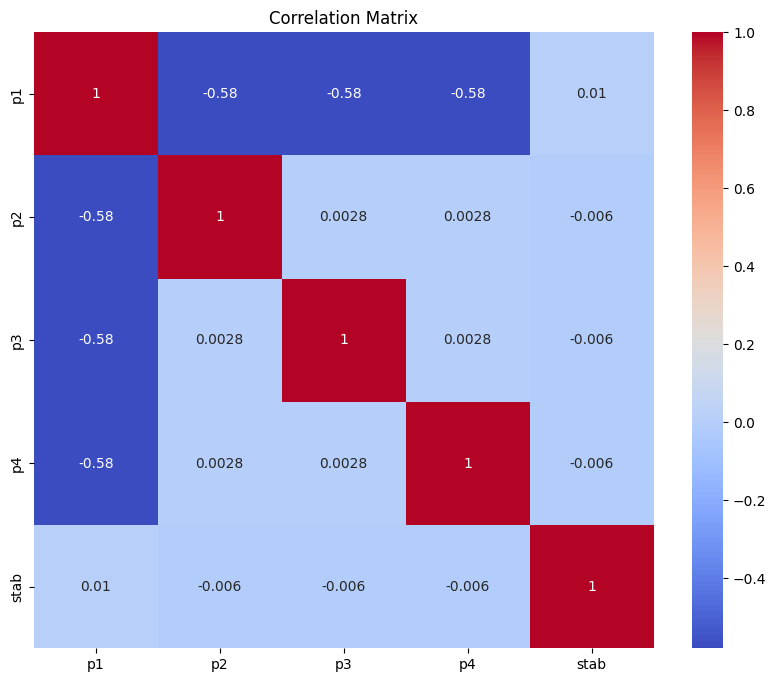

In [14]:
# Correlation matrix
correlation_matrix = df[['p1', 'p2', 'p3', 'p4', 'stab']].corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

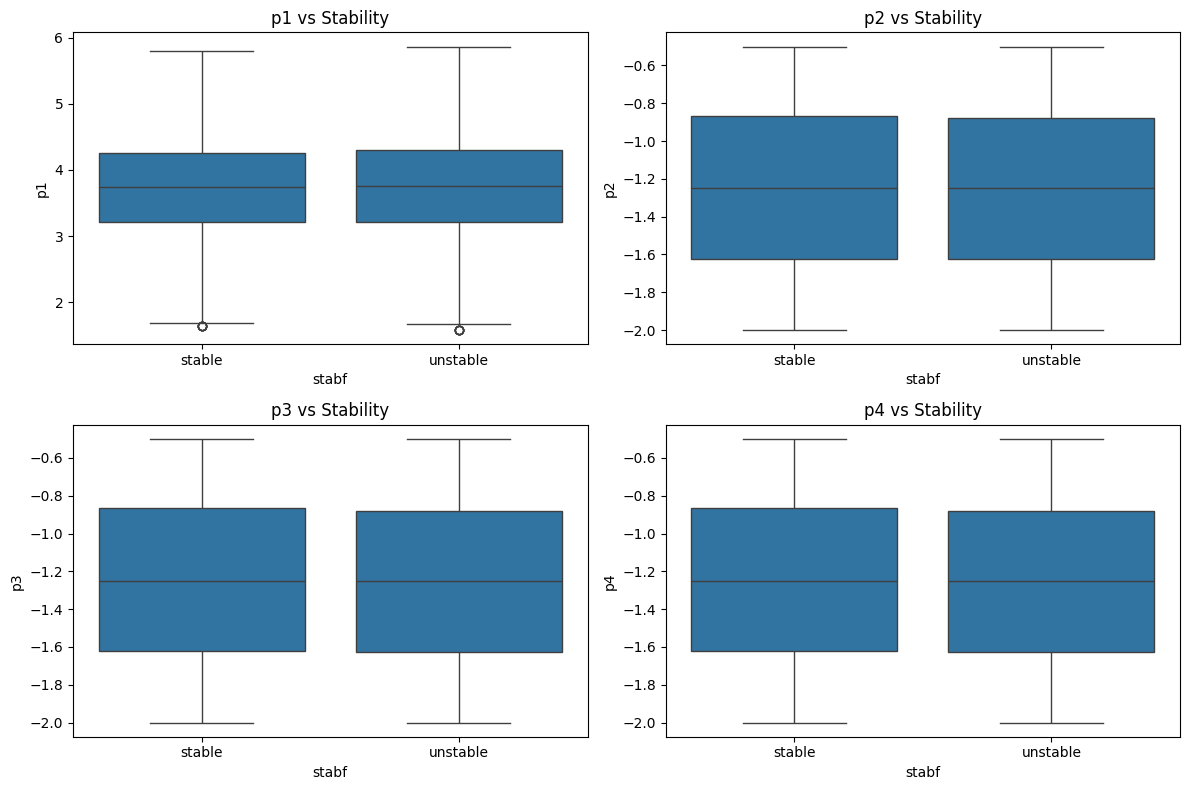

In [15]:
# Boxplot to show distribution of power consumption based on stability
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='stabf', y='p1', data=df, ax=axs[0, 0])
axs[0, 0].set_title('p1 vs Stability')

sns.boxplot(x='stabf', y='p2', data=df, ax=axs[0, 1])
axs[0, 1].set_title('p2 vs Stability')

sns.boxplot(x='stabf', y='p3', data=df, ax=axs[1, 0])
axs[1, 0].set_title('p3 vs Stability')

sns.boxplot(x='stabf', y='p4', data=df, ax=axs[1, 1])
axs[1, 1].set_title('p4 vs Stability')

plt.tight_layout()
plt.show()

# ✅Conclusion on Power Consumption (p1, p2, p3, p4) and Smart Grid Stability:

Based on the provided box plots showing the relationship between power consumption (p1, p2, p3, p4) and the stability of the smart grid, we can draw the following conclusions:

1. No Significant Differences in Medians and Ranges 📊:

The box plots for power consumption (p1, p2, p3, p4) across stable and unstable states of the smart grid show no significant differences in medians and ranges between the two states. This indicates that power consumption is similar across stable and unstable conditions with no substantial variation.

2. Lack of Major Outliers ⚠️:

The plots show that power consumption follows a normal distribution in most cases without major outliers. This suggests that power consumption remains relatively consistent across the network in both stable and unstable states.

3. Independence of Power Consumption 🔄:

There are no significant indications of a strong correlation between power consumption and the stability of the smart grid. This means that in this case, power consumption might not significantly influence the stability of the grid.

# 5️⃣ Visulation for Price Elasticity Coefficients

            g1        g2        g3        g4      stab
g1    1.000000  0.004718  0.004718  0.004718  0.282774
g2    0.004718  1.000000 -0.006939 -0.006939  0.293684
g3    0.004718 -0.006939  1.000000 -0.006939  0.293684
g4    0.004718 -0.006939 -0.006939  1.000000  0.293684
stab  0.282774  0.293684  0.293684  0.293684  1.000000


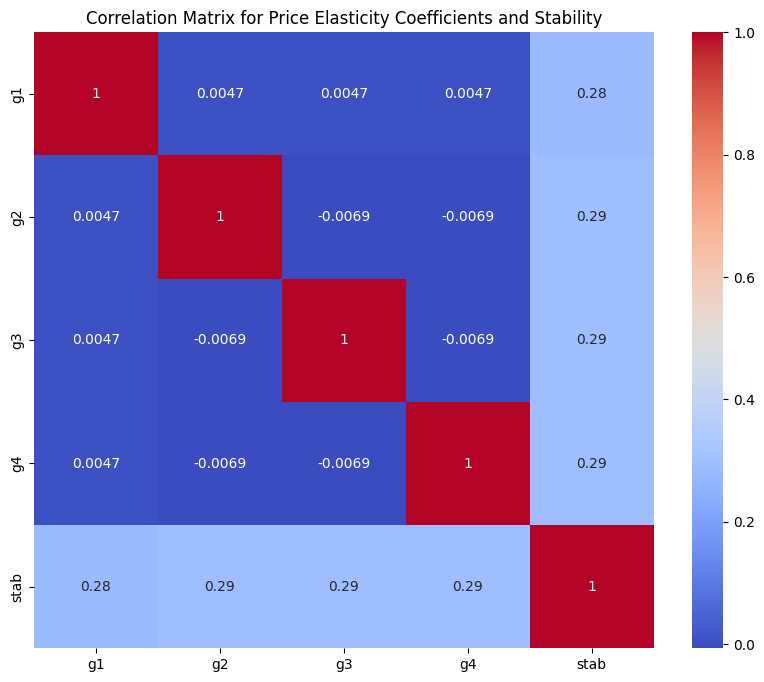

In [16]:
# Correlation matrix for g1, g2, g3, g4 and stability
correlation_matrix = df[['g1', 'g2', 'g3', 'g4', 'stab']].corr()
print(correlation_matrix)

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Price Elasticity Coefficients and Stability')
plt.show()

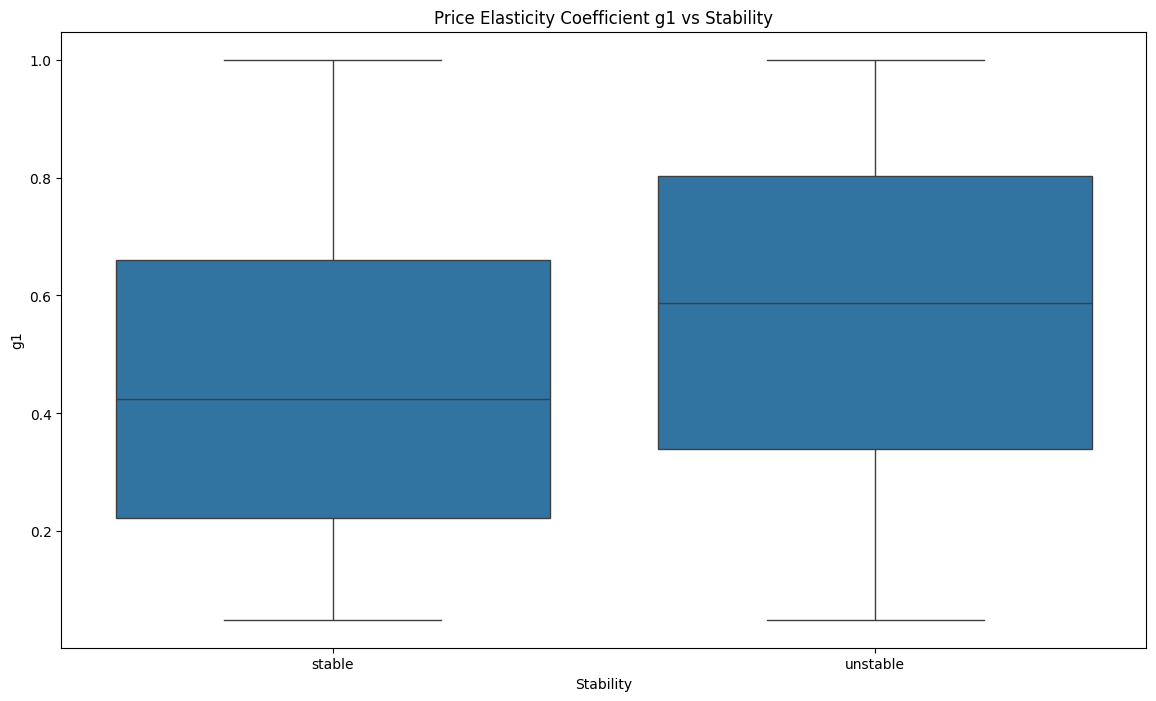

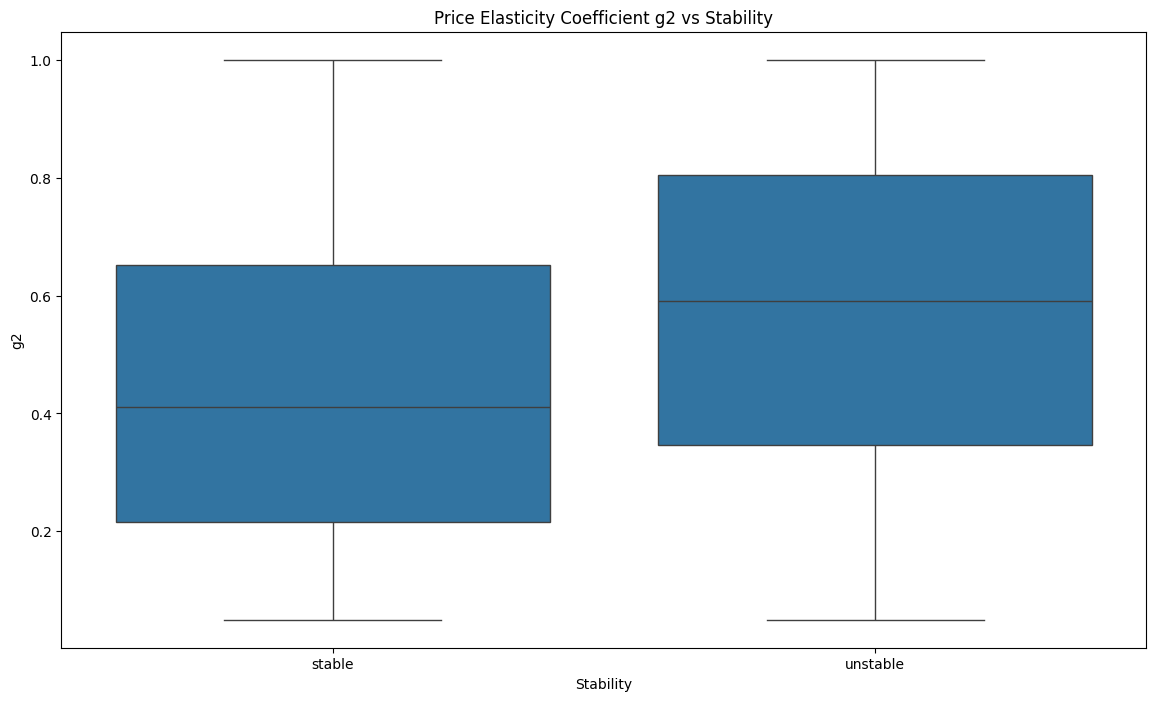

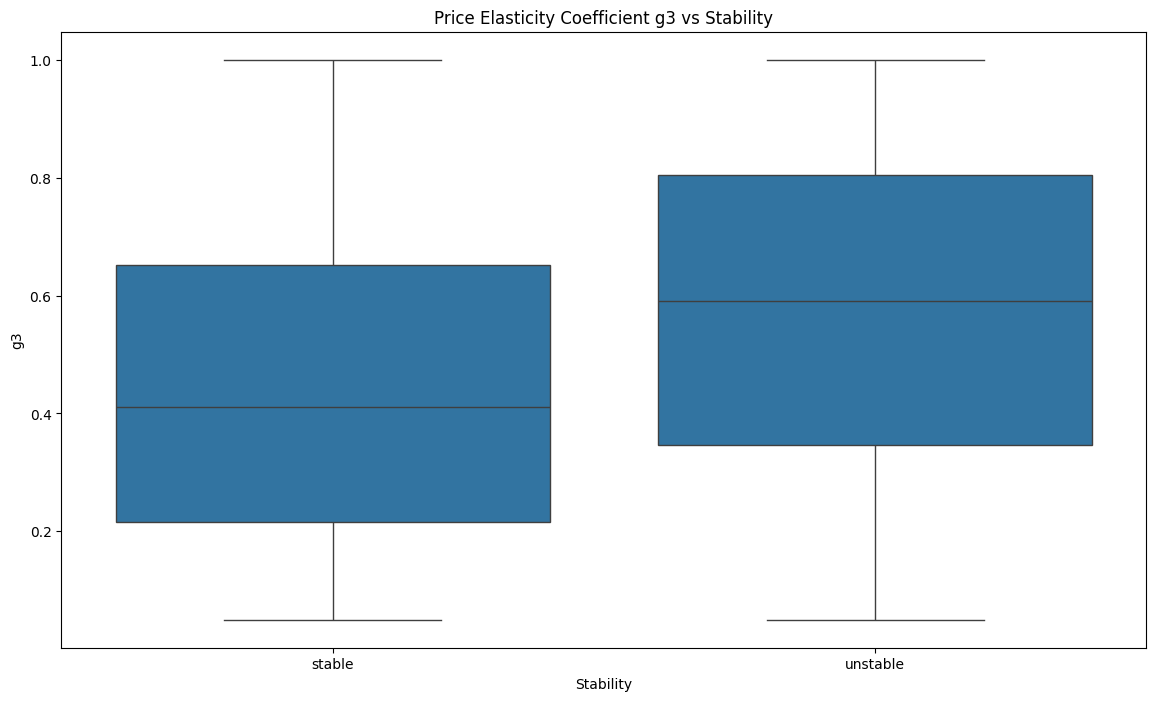

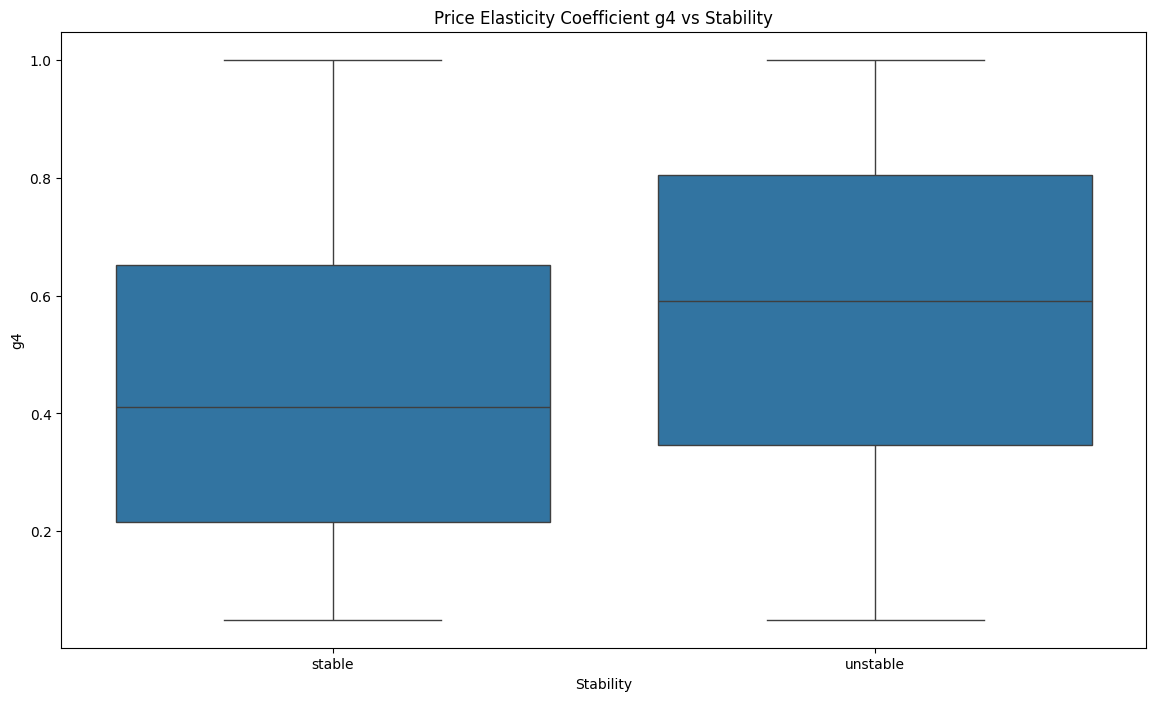

In [17]:
# Boxplot to show distribution of price elasticity coefficients based on stability
plt.figure(figsize=(14, 8))
sns.boxplot(x='stabf', y='g1', data=df)
plt.xlabel('Stability')
plt.ylabel('g1')
plt.title('Price Elasticity Coefficient g1 vs Stability')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='stabf', y='g2', data=df)
plt.xlabel('Stability')
plt.ylabel('g2')
plt.title('Price Elasticity Coefficient g2 vs Stability')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='stabf', y='g3', data=df)
plt.xlabel('Stability')
plt.ylabel('g3')
plt.title('Price Elasticity Coefficient g3 vs Stability')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='stabf', y='g4', data=df)
plt.xlabel('Stability')
plt.ylabel('g4')
plt.title('Price Elasticity Coefficient g4 vs Stability')
plt.show()


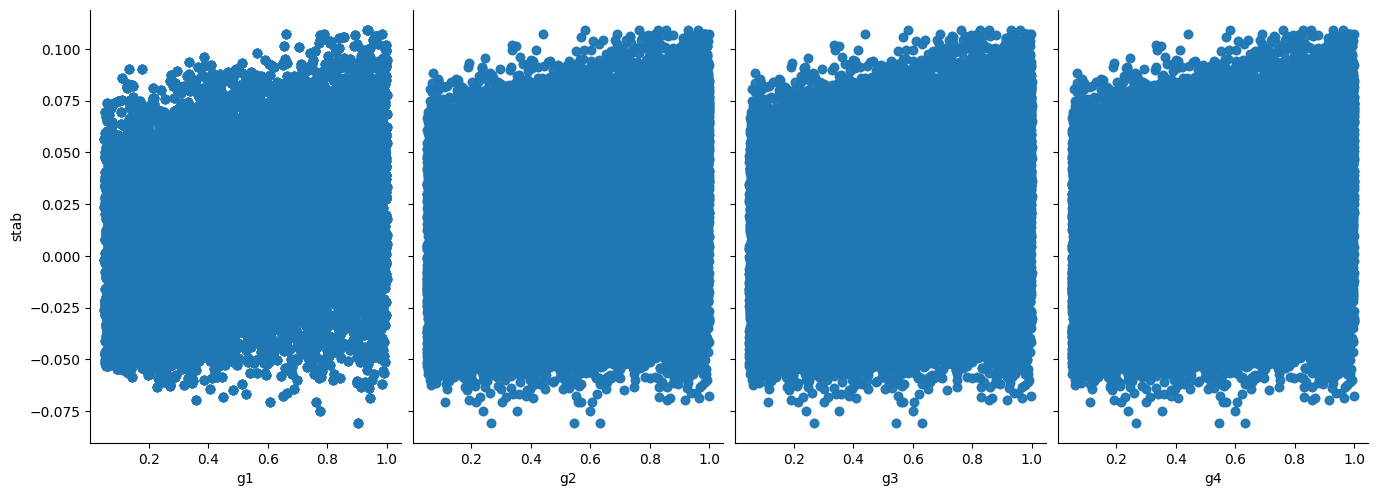

In [18]:
# Scatter plot and regression analysis
sns.pairplot(df, x_vars=['g1', 'g2', 'g3', 'g4'], y_vars='stab', height=5, aspect=0.7, kind='reg')
plt.show()


### Conclusions 📝

1. **Box Plot Analysis**:
   - The median value of `g3` is slightly lower for unstable conditions compared to stable conditions.
   - The spread of `g3` values is larger in unstable conditions, indicating more variability in price elasticity when the grid is unstable.

2. **Correlation Matrix Analysis**:
   - There is a weak positive correlation between each price elasticity coefficient and stability, suggesting that higher values of these coefficients might be slightly associated with more stable conditions.

3. **Scatter Plot Analysis**:
   - The scatter plots show a relatively uniform spread of data points with no clear pattern or trend.
   - The stability (`stab`) values range approximately from -0.075 to 0.1 for all four coefficients, indicating variability in stability across different values of the price elasticity coefficients.

### Overall Analysis 🧐:
- In the context of a smart grid, price elasticity coefficients show weak and variable relationships with stability.
- While there is a slight tendency for higher elasticity to be associated with more stable conditions, the overall impact is not strong.


# 6️⃣ Build Machine Learning Models
1. Feautures:tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4 .
2. Target: stab or stabf.

# ⌛ Importing Libs


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# 🗂️ Select features and target

In [20]:
features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
target = 'stabf'

X = df[features]
y = df[target]

# 🔍 Split data & Feauture scaling

In [21]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
#Model 1- LogistiRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
print("Logistic Regression Validation Performance")
print(classification_report(y_val, y_pred_val))

Logistic Regression Validation Performance
              precision    recall  f1-score   support

      stable       0.75      0.68      0.72      3244
    unstable       0.83      0.87      0.85      5756

    accuracy                           0.81      9000
   macro avg       0.79      0.78      0.79      9000
weighted avg       0.80      0.81      0.80      9000



In [24]:
# Model 2 - Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_val_rf = rf.predict(X_val)
print("Random Forest Validation Performance")
print(classification_report(y_val, y_pred_val_rf))

Random Forest Validation Performance
              precision    recall  f1-score   support

      stable       0.94      0.90      0.92      3244
    unstable       0.95      0.97      0.96      5756

    accuracy                           0.95      9000
   macro avg       0.95      0.94      0.94      9000
weighted avg       0.95      0.95      0.95      9000



In [25]:
# Model 3 - Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_test = best_rf.predict(X_test)
print("Best Random Forest Test Performance")
print(classification_report(y_test, y_pred_test))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest Test Performance
              precision    recall  f1-score   support

      stable       0.94      0.92      0.93      3241
    unstable       0.95      0.97      0.96      5759

    accuracy                           0.95      9000
   macro avg       0.95      0.94      0.95      9000
weighted avg       0.95      0.95      0.95      9000



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    val_report = classification_report(y_val, y_pred_val, output_dict=True)
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    results[model_name] = {
        'Validation': val_report,
        'Test': test_report
    }

# Print evaluation results
for model_name, reports in results.items():
    print(f"Model: {model_name}")
    print("Validation Report:")
    print(classification_report(y_val, models[model_name].predict(X_val)))
    print("Test Report:")
    print(classification_report(y_test, models[model_name].predict(X_test)))
    print("="*60)

Model: Logistic Regression
Validation Report:
              precision    recall  f1-score   support

      stable       0.75      0.68      0.72      3244
    unstable       0.83      0.87      0.85      5756

    accuracy                           0.81      9000
   macro avg       0.79      0.78      0.79      9000
weighted avg       0.80      0.81      0.80      9000

Test Report:
              precision    recall  f1-score   support

      stable       0.77      0.71      0.74      3241
    unstable       0.84      0.88      0.86      5759

    accuracy                           0.82      9000
   macro avg       0.81      0.80      0.80      9000
weighted avg       0.82      0.82      0.82      9000

Model: Random Forest
Validation Report:
              precision    recall  f1-score   support

      stable       0.94      0.90      0.92      3244
    unstable       0.95      0.97      0.96      5756

    accuracy                           0.95      9000
   macro avg       0.95      

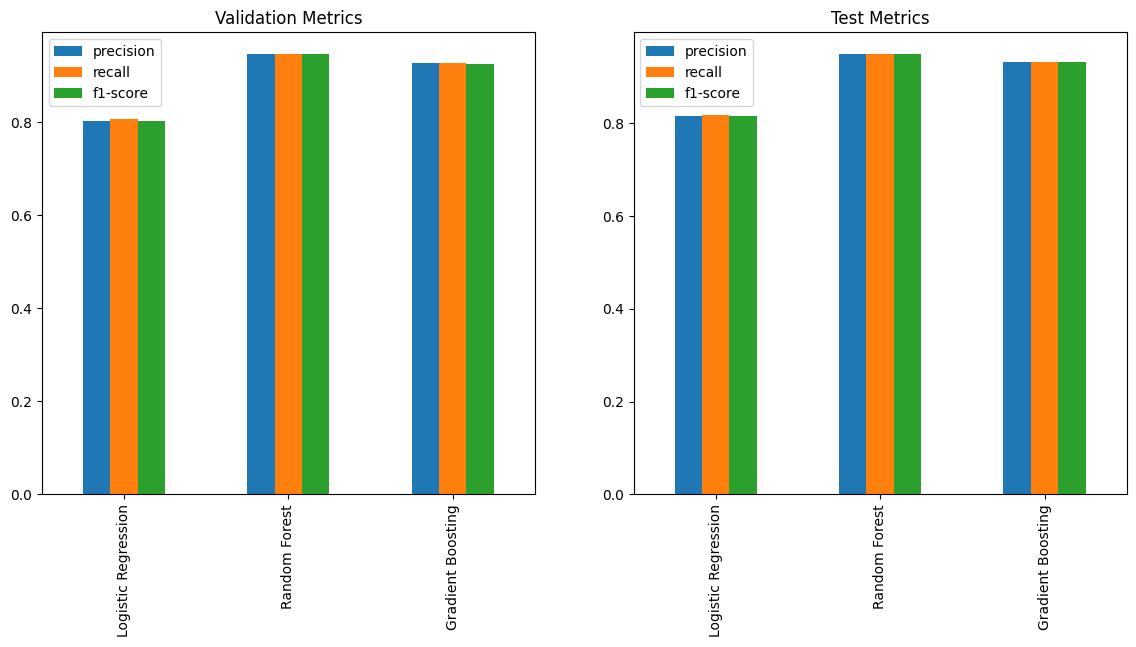

In [27]:
# Collect metrics for visualization
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
model_names = list(results.keys())
val_metrics = {metric: [] for metric in metrics}
test_metrics = {metric: [] for metric in metrics}

for model_name, reports in results.items():
    for metric in metrics:
        # Check if 'weighted avg' exists before accessing metrics
        if 'weighted avg' in reports['Validation']:
            val_metrics[metric].append(reports['Validation']['weighted avg'].get(metric, None))
        if 'weighted avg' in reports['Test']:
            test_metrics[metric].append(reports['Test']['weighted avg'].get(metric, None))

# Create DataFrames for plotting
val_df = pd.DataFrame(val_metrics, index=model_names)
test_df = pd.DataFrame(test_metrics, index=model_names)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
val_df.plot(kind='bar', ax=axes[0], title='Validation Metrics')
test_df.plot(kind='bar', ax=axes[1], title='Test Metrics')
plt.show()

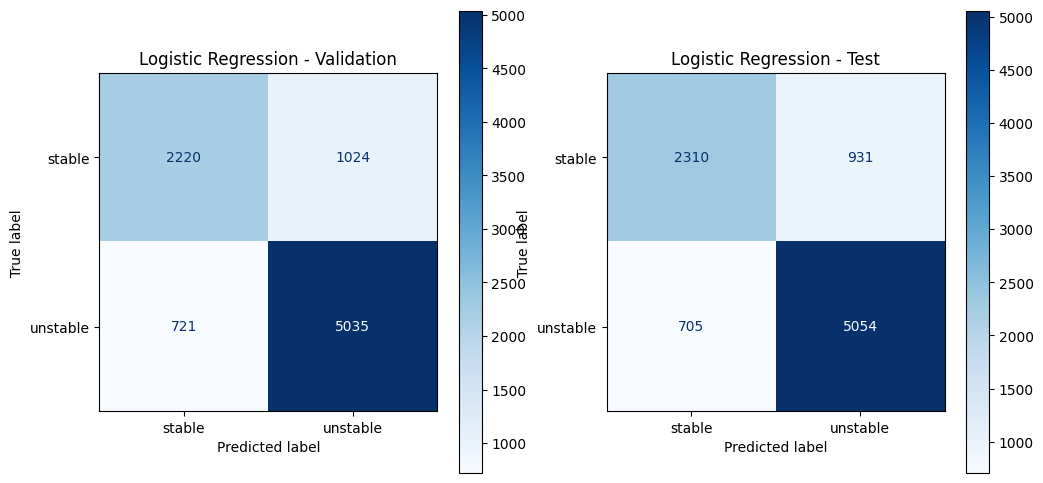

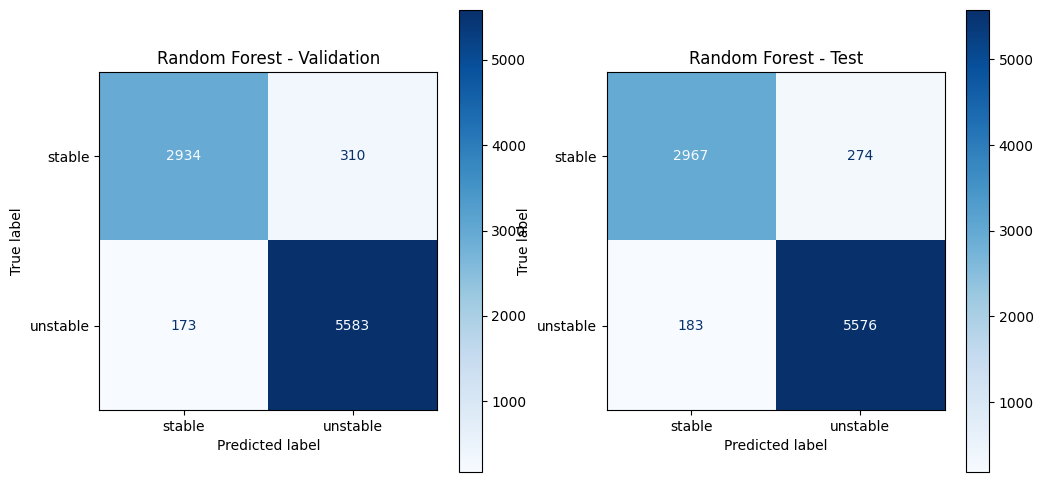

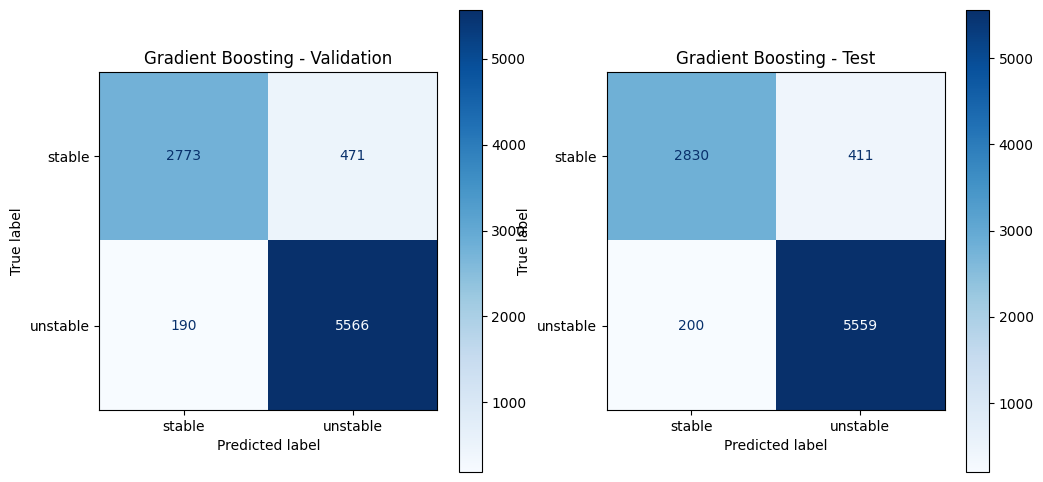

In [28]:
# Plot confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay
for model_name, model in models.items():
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_val, y_val, ax=ax[0], cmap='Blues')
    ax[0].set_title(f'{model_name} - Validation')
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax[1], cmap='Blues')
    ax[1].set_title(f'{model_name} - Test')
    plt.show()



## Conclusion: Stability of the Smart Grid Using Machine Learning Models 🚀

After evaluating three different machine learning models—Logistic Regression, Random Forest, and Gradient Boosting—on their ability to predict the stability of the smart grid, we can draw the following conclusions:

### 📊 Logistic Regression
- **Validation Accuracy:** 0.81
- **Test Accuracy:** 0.82
- **F1-Score for Stable (Validation):** 0.72
- **F1-Score for Stable (Test):** 0.74
- **F1-Score for Unstable (Validation):** 0.85
- **F1-Score for Unstable (Test):** 0.86

Logistic Regression demonstrates decent performance but struggles more with correctly identifying stable conditions compared to the other models.

### 🌲 Random Forest
- **Validation Accuracy:** 0.95
- **Test Accuracy:** 0.95
- **F1-Score for Stable (Validation):** 0.92
- **F1-Score for Stable (Test):** 0.93
- **F1-Score for Unstable (Validation):** 0.96
- **F1-Score for Unstable (Test):** 0.96

Random Forest excels with a high accuracy of 95%, showing outstanding precision, recall, and F1-scores for both stable and unstable classes. It is the most reliable model for this task.

### 🌟 Gradient Boosting
- **Validation Accuracy:** 0.93
- **Test Accuracy:** 0.93
- **F1-Score for Stable (Validation):** 0.89
- **F1-Score for Stable (Test):** 0.90
- **F1-Score for Unstable (Validation):** 0.94
- **F1-Score for Unstable (Test):** 0.95

Gradient Boosting also performs very well with an accuracy of 93%. It is highly reliable, especially for predicting unstable conditions, and is a strong alternative to Random Forest.

### 🏆 Final Verdict
- **Best Model:** Random Forest 🌲✨
  - It provides the best balance of accuracy, precision, and recall.
  - Recommended for deployment to predict smart grid stability.
- **Strong Contender:** Gradient Boosting 🌟
  - Slightly lower performance than Random Forest but still highly effective.
  - A great backup model or for additional insights.




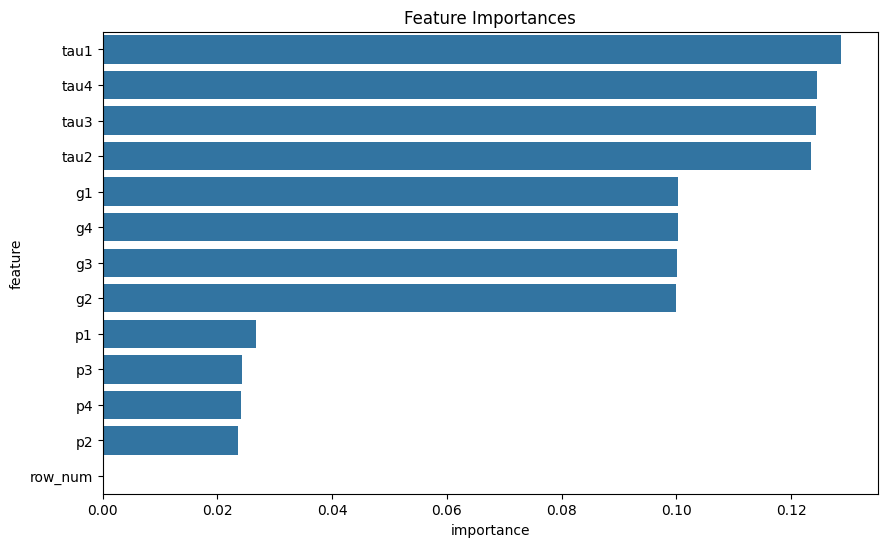

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(columns=['stab', 'stabf'])
y = df['stabf'].apply(lambda x: 1 if x == 'stable' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the feature importances
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()
